# Forest Fire

## Predicting the area spreaded with fire.

### Data analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
data_frame=pd.read_csv('forest_fires.csv')

In [36]:
data_frame.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
output_feature='area'

In [38]:
for cols in data_frame.columns:
    print('{} : {}'.format(cols,data_frame[cols].dtype))

X : int64
Y : int64
month : object
day : object
FFMC : float64
DMC : float64
DC : float64
ISI : float64
temp : float64
RH : int64
wind : float64
rain : float64
area : float64


In [39]:
data_frame.shape

(517, 13)

In [40]:
for cols in data_frame.columns:
    length=len(data_frame[cols].unique())
    print('{} has {} unique values'.format(cols,length))

X has 9 unique values
Y has 7 unique values
month has 12 unique values
day has 7 unique values
FFMC has 106 unique values
DMC has 215 unique values
DC has 219 unique values
ISI has 119 unique values
temp has 192 unique values
RH has 75 unique values
wind has 21 unique values
rain has 7 unique values
area has 251 unique values


In [41]:
#checking missing values.
data_frame.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There are no missing values

In [42]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [43]:
data_frame[categorical_features].head()

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun


In [44]:
data_frame[numerical_features].head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


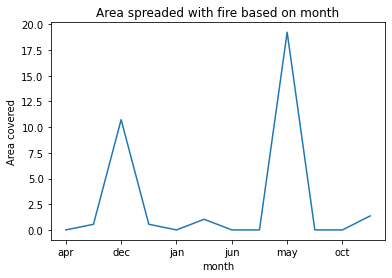

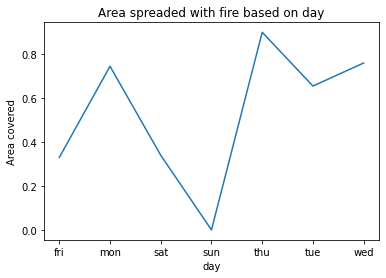

In [45]:
#relationship between categorical features and output feature.
for cols in categorical_features:
    plt.title('Area spreaded with fire based on {}'.format(cols))
    plt.ylabel('Area covered')
    data_frame.groupby(cols)[output_feature].median().plot()
    plt.show()

During the month of May, it covered large area which is 20.0 following that in december month which little greater than 10.0. The area was low during April, January, June, October.

Secondly, the area covered was large during Thruday i.e greater than 0.8 whereas during monday, thurday, tuesday and wednesday the fire covered similar distance that it near to 0.8. Sunday has the least distance covered and Friday, Saturday has similar distance covered i.e approx 0.5.


In [46]:
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [47]:
data_frame[discrete_features].head()

,X,Y,wind,rain
0,7,5,6.7,0.0
1,7,4,0.9,0.0
2,7,4,1.3,0.0
3,8,6,4.0,0.2
4,8,6,1.8,0.0


In [48]:
data_frame[continuos_features].head()

,FFMC,DMC,DC,ISI,temp,RH,area
0,86.2,26.2,94.3,5.1,8.2,51,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.0
2,90.6,43.7,686.9,6.7,14.6,33,0.0
3,91.7,33.3,77.5,9.0,8.3,97,0.0
4,89.3,51.3,102.2,9.6,11.4,99,0.0


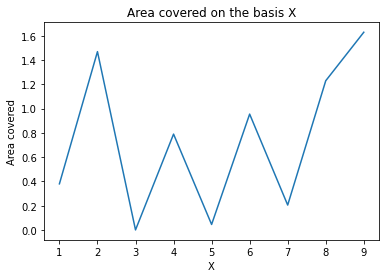

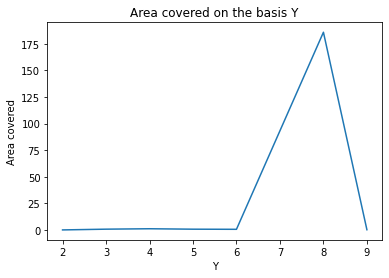

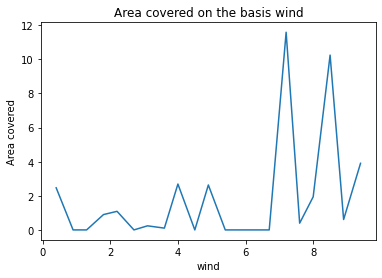

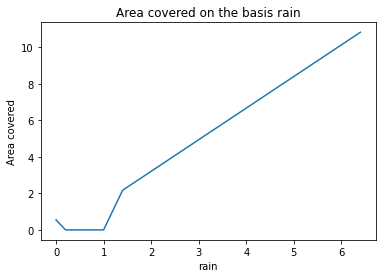

In [49]:
#relationship between discrete features and output feature.
for cols in discrete_features:
    plt.title('Area covered on the basis {}'.format(cols))
    plt.ylabel('Area covered')
    data_frame.groupby(cols)[output_feature].median().plot()
    plt.show()

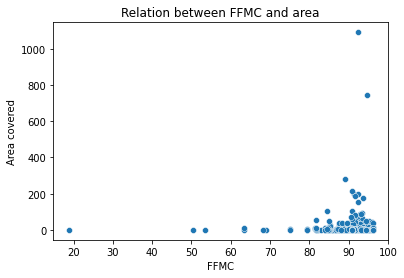

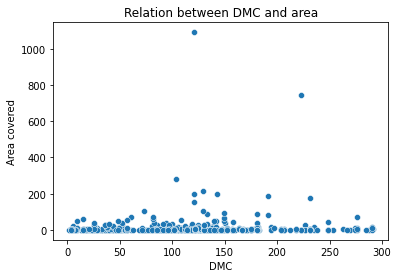

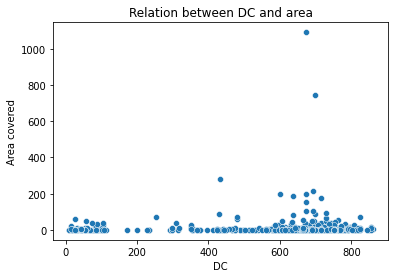

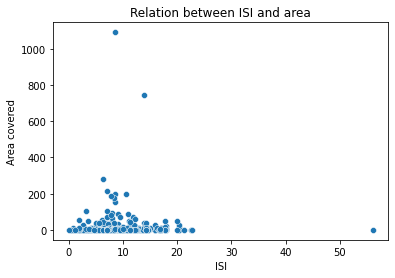

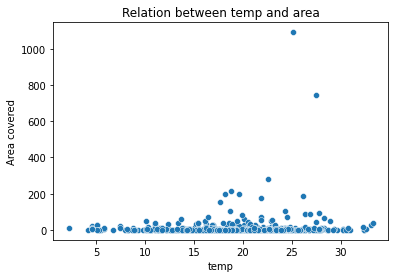

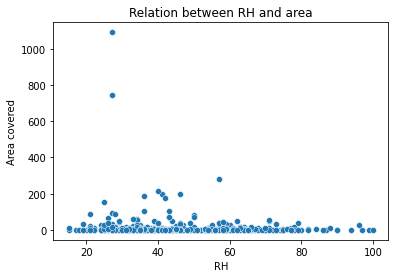

In [51]:
#relationship between continuos_features and output feature.
for cols in continuos_features:
    if cols!='area':
        plt.title('Relation between {} and {}'.format(cols,output_feature))
        plt.xlabel(cols)
        plt.ylabel('Area covered')
        sns.scatterplot(data_frame[cols],data_frame[output_feature])
        plt.show()

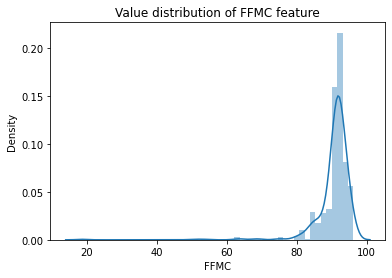

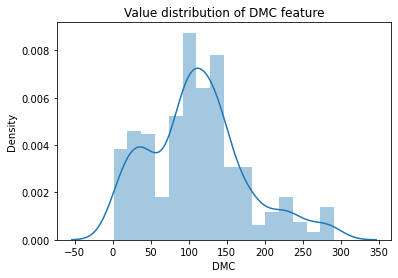

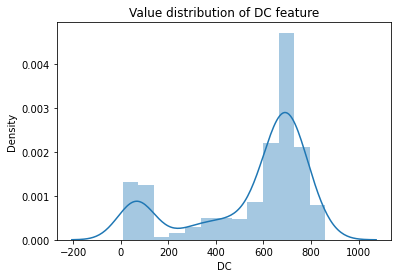

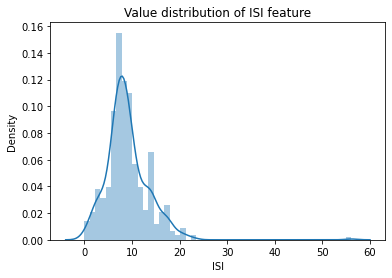

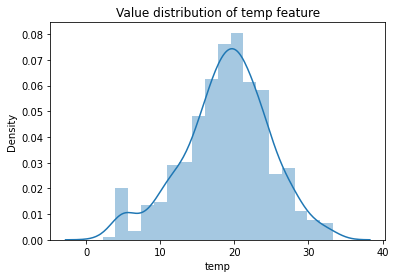

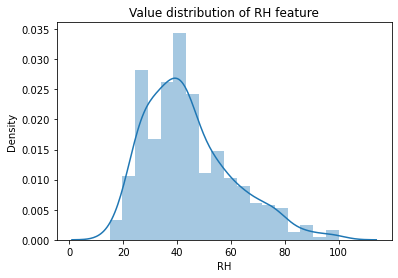

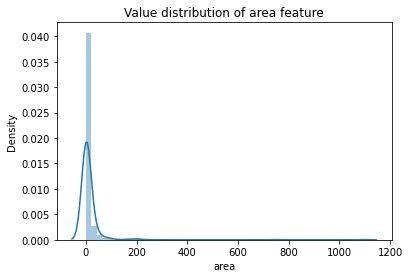

In [55]:
#Checking the value distribution in continuos_features.
for cols in continuos_features:
    plt.title('Value distribution of {} feature'.format(cols))
    plt.xlabel(cols)
    sns.distplot(data_frame[cols])
    plt.show()

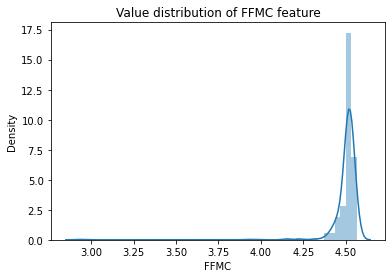

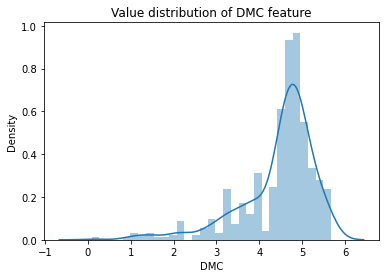

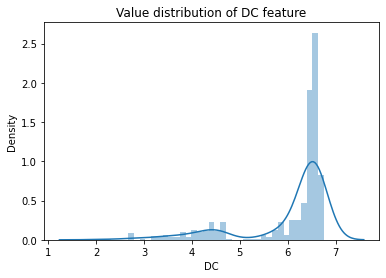

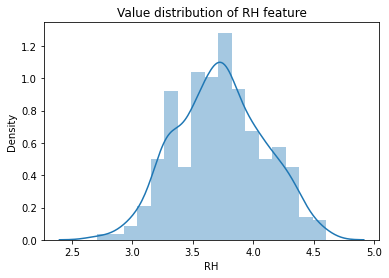

In [57]:
#coverting them to log values since the features expect 'temp' have skewed.
for cols in continuos_features:
    if 0 not in data_frame[cols].unique():
        if cols!='temp':
            data=data_frame.copy()
            data[cols]=np.log(data[cols])
            plt.title('Value distribution of {} feature'.format(cols))
            plt.xlabel(cols)
            sns.distplot(data[cols])
            plt.show()

After transforming to log values, RH feature has normally distributed.

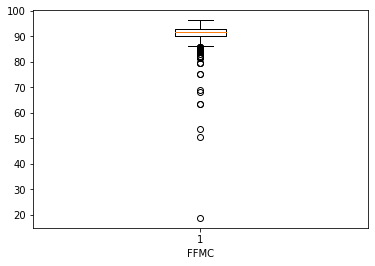

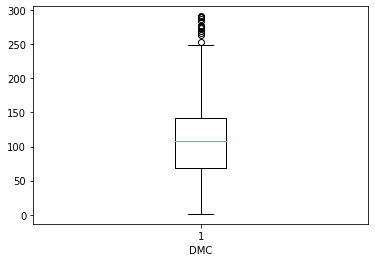

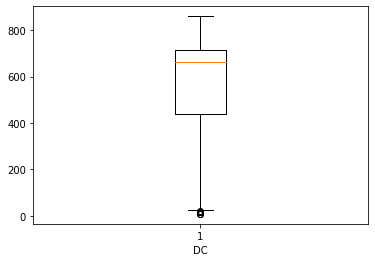

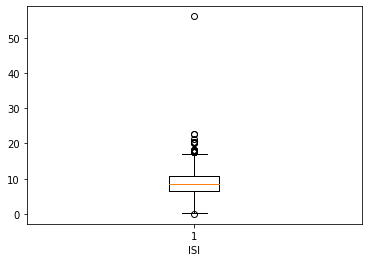

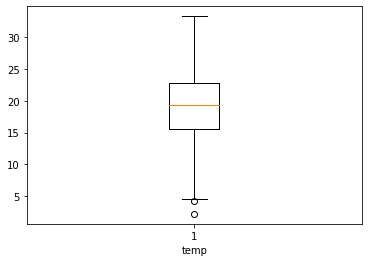

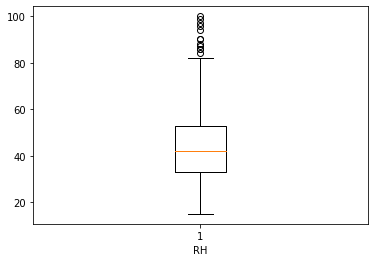

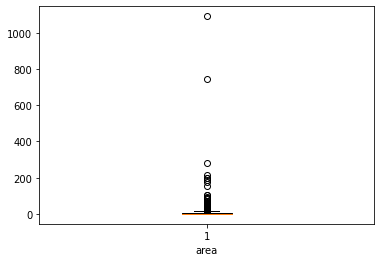

In [59]:
#finding the outliers.
for cols in continuos_features:
    plt.boxplot(data_frame[cols])
    plt.xlabel(cols)
    plt.show()